In [1]:
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


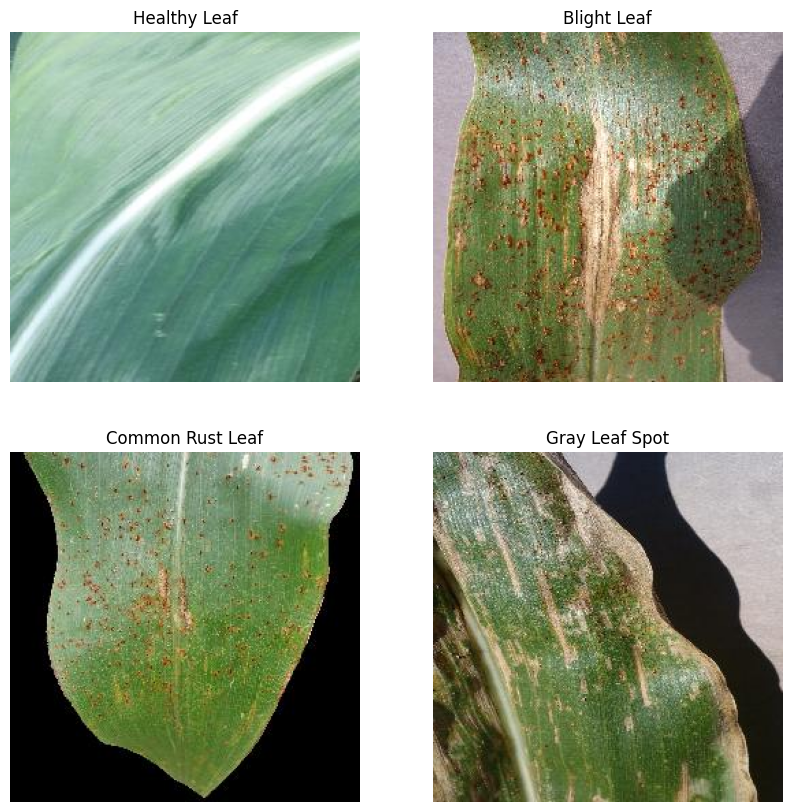

In [107]:
blight_1=plt.imread('/content/drive/MyDrive/data/Blight/Corn_Blight (1000).JPG')
common_rust_1=plt.imread('/content/drive/MyDrive/data/Common_Rust/Corn_Common_Rust (1004).JPG')
healthy_1=plt.imread('/content/drive/MyDrive/data/Healthy/Corn_Health (1003).jpg')
grayleafspot_1=plt.imread('/content/drive/MyDrive/data/Gray_Leaf_Spot/Corn_Gray_Spot (103).JPG')
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(healthy_1)
plt.axis("off")
plt.title("Healthy Leaf")
plt.subplot(2,2,2)
plt.imshow(blight_1)
plt.axis("off")
plt.title("Blight Leaf")
plt.subplot(2,2,3)
plt.imshow(common_rust_1)
plt.axis("off")
plt.title("Common Rust Leaf")
plt.subplot(2,2,4)
plt.imshow(grayleafspot_1)
plt.axis("off")
plt.title("Gray Leaf Spot")
plt.show()


In [108]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

In [109]:
# Resize the image

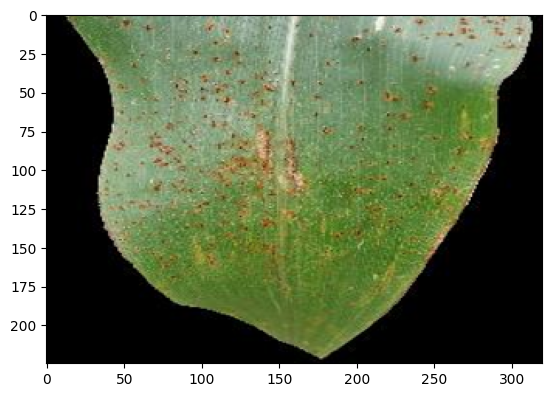

In [110]:
common_rust_1_resize=Image.open('/content/drive/MyDrive/data/Common_Rust/Corn_Common_Rust (1004).JPG')
common_rust_1_resize=common_rust_1_resize.resize((320,225))
common_rust_1_resize=np.array(common_rust_1_resize)
plt.imshow(common_rust_1_resize)

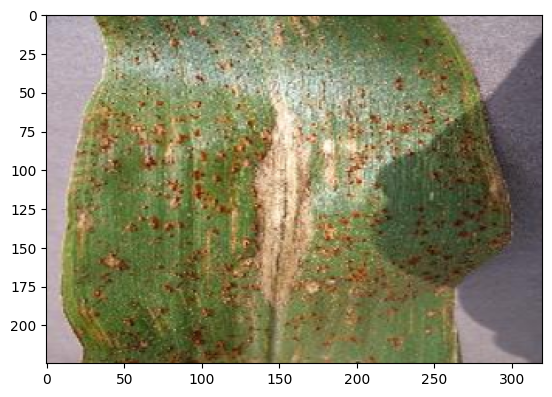

In [111]:
blight_1_resize=Image.open('/content/drive/MyDrive/data/Blight/Corn_Blight (1000).JPG')
blight_1_resize=blight_1_resize.resize((320,225))
blight_1_resize=np.array(blight_1_resize)
plt.imshow(blight_1_resize)

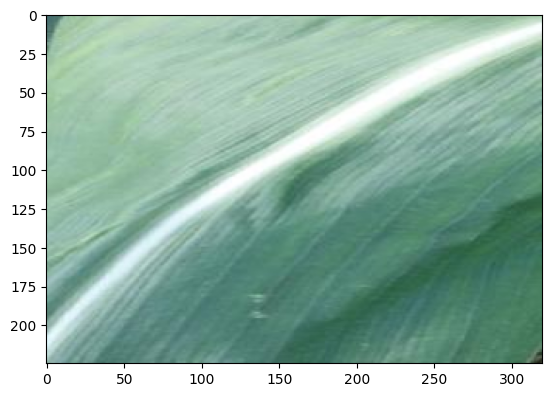

In [112]:
healthy_1_resize=Image.open('/content/drive/MyDrive/data/Healthy/Corn_Health (1003).jpg')
healthy_1_resize=healthy_1_resize.resize((320,225))
healthy_1_resize=np.array(healthy_1_resize)
plt.imshow(healthy_1_resize)

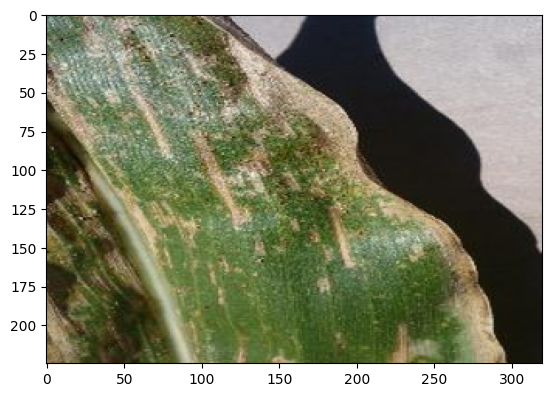

In [113]:
grayleafspot_1_resize=Image.open('/content/drive/MyDrive/data/Gray_Leaf_Spot/Corn_Gray_Spot (103).JPG')
grayleafspot_1_resize=grayleafspot_1_resize.resize((320,225))
grayleafspot_1_resize=np.array(grayleafspot_1_resize)
plt.imshow(grayleafspot_1_resize)

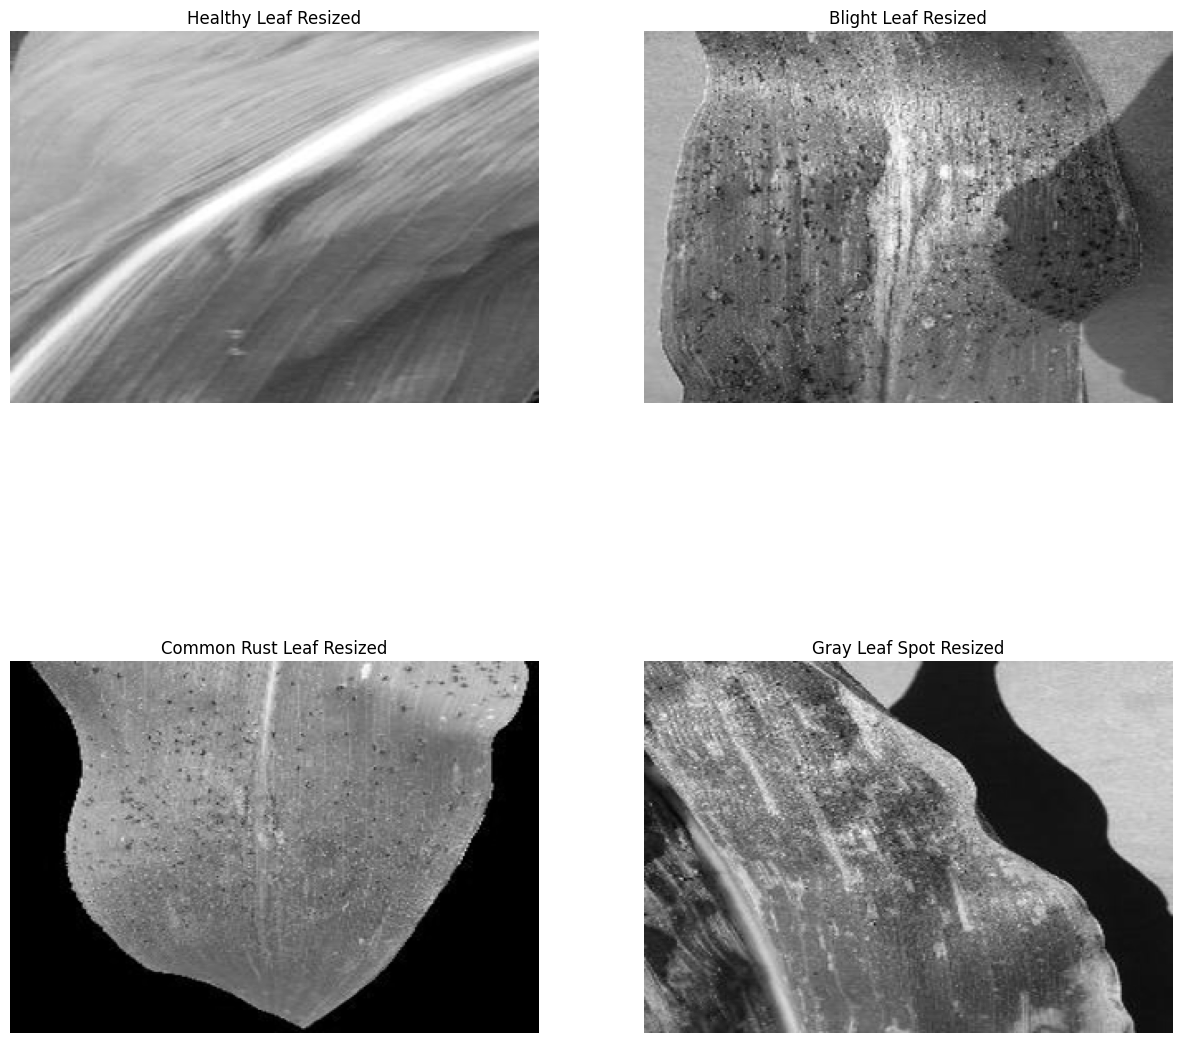

<Figure size 640x480 with 0 Axes>

In [114]:
# gray scale of the image
blight_gray = rgb2gray(blight_1_resize)
healthy_gray = rgb2gray(healthy_1_resize)
common_rust_gray = rgb2gray(common_rust_1_resize)
grayleafspot_gray = rgb2gray(grayleafspot_1_resize)

# plot the gray scale images
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(healthy_gray, cmap='gray')
plt.axis("off")
plt.title("Healthy Leaf Resized")
plt.subplot(2,2,2)
plt.imshow(blight_gray,cmap='gray')
plt.axis("off")
plt.title("Blight Leaf Resized")
plt.subplot(2,2,3)
plt.imshow(common_rust_gray, cmap='gray')
plt.axis("off")
plt.title("Common Rust Leaf Resized")
plt.subplot(2,2,4)
plt.imshow(grayleafspot_gray, cmap='gray')
plt.axis("off")
plt.title("Gray Leaf Spot Resized")
plt.show()
plt.savefig('/content/drive/MyDrive/data/gray_images.png')

In [115]:
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr=blight_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
blight_gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

In [116]:
arr=healthy_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
healthy_gray_segmented=arr.reshape(healthy_gray.shape[0],healthy_gray.shape[1])

In [117]:
arr=common_rust_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
common_rust_gray_segmented=arr.reshape(common_rust_gray.shape[0],common_rust_gray.shape[1])


In [118]:
arr=grayleafspot_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
grayleafspot_gray_segmented=arr.reshape(grayleafspot_gray.shape[0],grayleafspot_gray.shape[1])

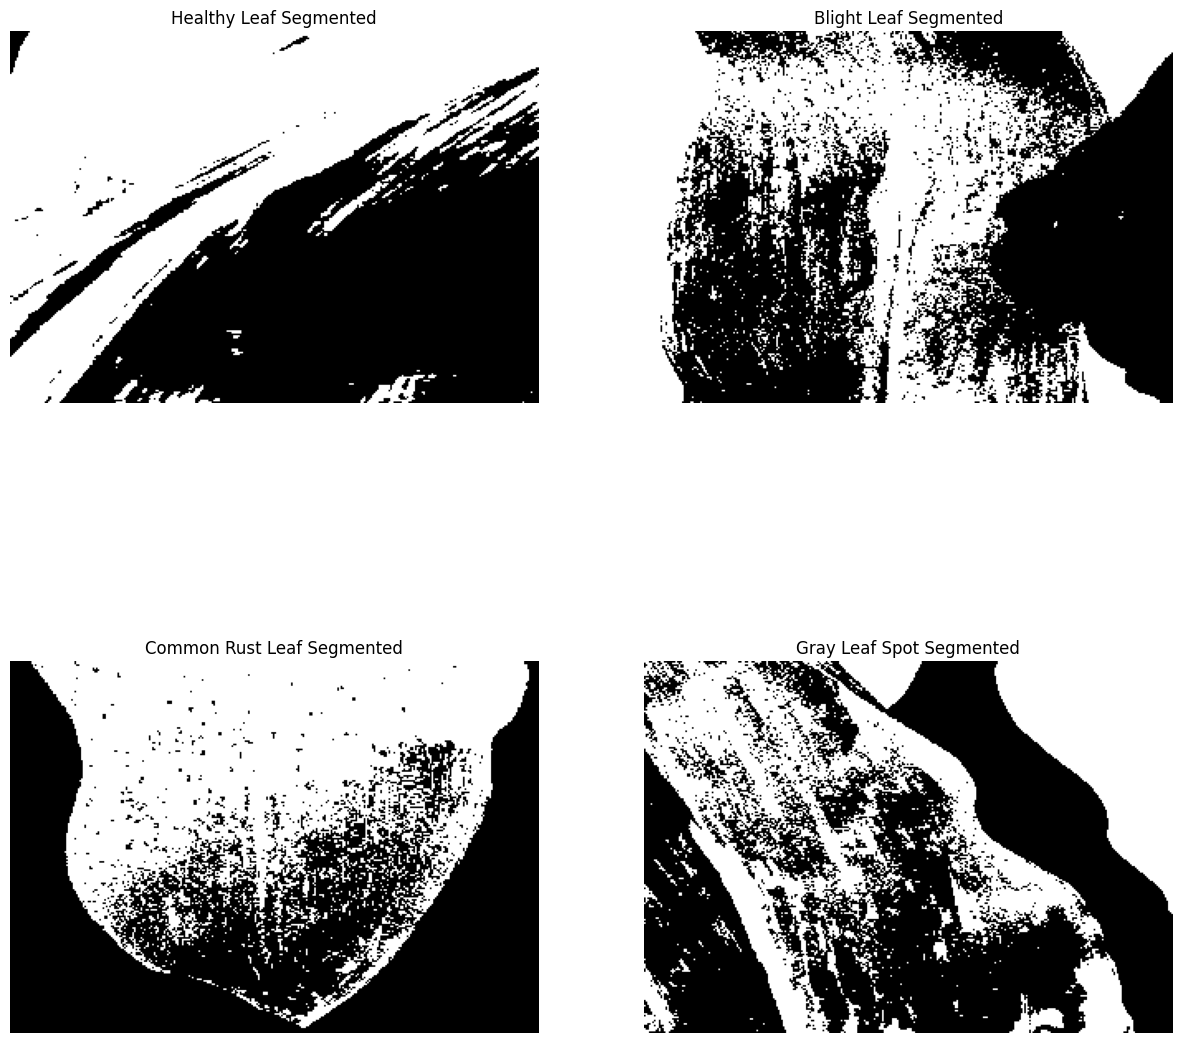

<Figure size 640x480 with 0 Axes>

In [119]:

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(healthy_gray_segmented, cmap ='gray')
plt.axis("off")
plt.title("Healthy Leaf Segmented")
plt.subplot(2,2,2)
plt.imshow(blight_gray_segmented, cmap ='gray')
plt.axis("off")
plt.title("Blight Leaf Segmented")
plt.subplot(2,2,3)
plt.imshow(common_rust_gray_segmented, cmap ='gray')
plt.axis("off")
plt.title("Common Rust Leaf Segmented")
plt.subplot(2,2,4)
plt.imshow(grayleafspot_gray_segmented, cmap ='gray')
plt.axis("off")
plt.title("Gray Leaf Spot Segmented")
plt.show()
plt.savefig('/content/drive/MyDrive/data/Using threshold as segmentation.png')

In [120]:
# What if we tune the above function more??
arr=blight_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
blight_gray_segmented2=arr.reshape(blight_gray.shape[0],blight_gray.shape[1])



In [121]:
arr=healthy_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
healthy_gray_segmented2=arr.reshape(healthy_gray.shape[0],healthy_gray.shape[1])


In [122]:
arr=common_rust_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
common_rust_gray_segmented2=arr.reshape(common_rust_gray.shape[0],common_rust_gray.shape[1])

In [123]:
arr=grayleafspot_gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
grayleafspot_gray_segmented2=arr.reshape(grayleafspot_gray.shape[0],grayleafspot_gray.shape[1])

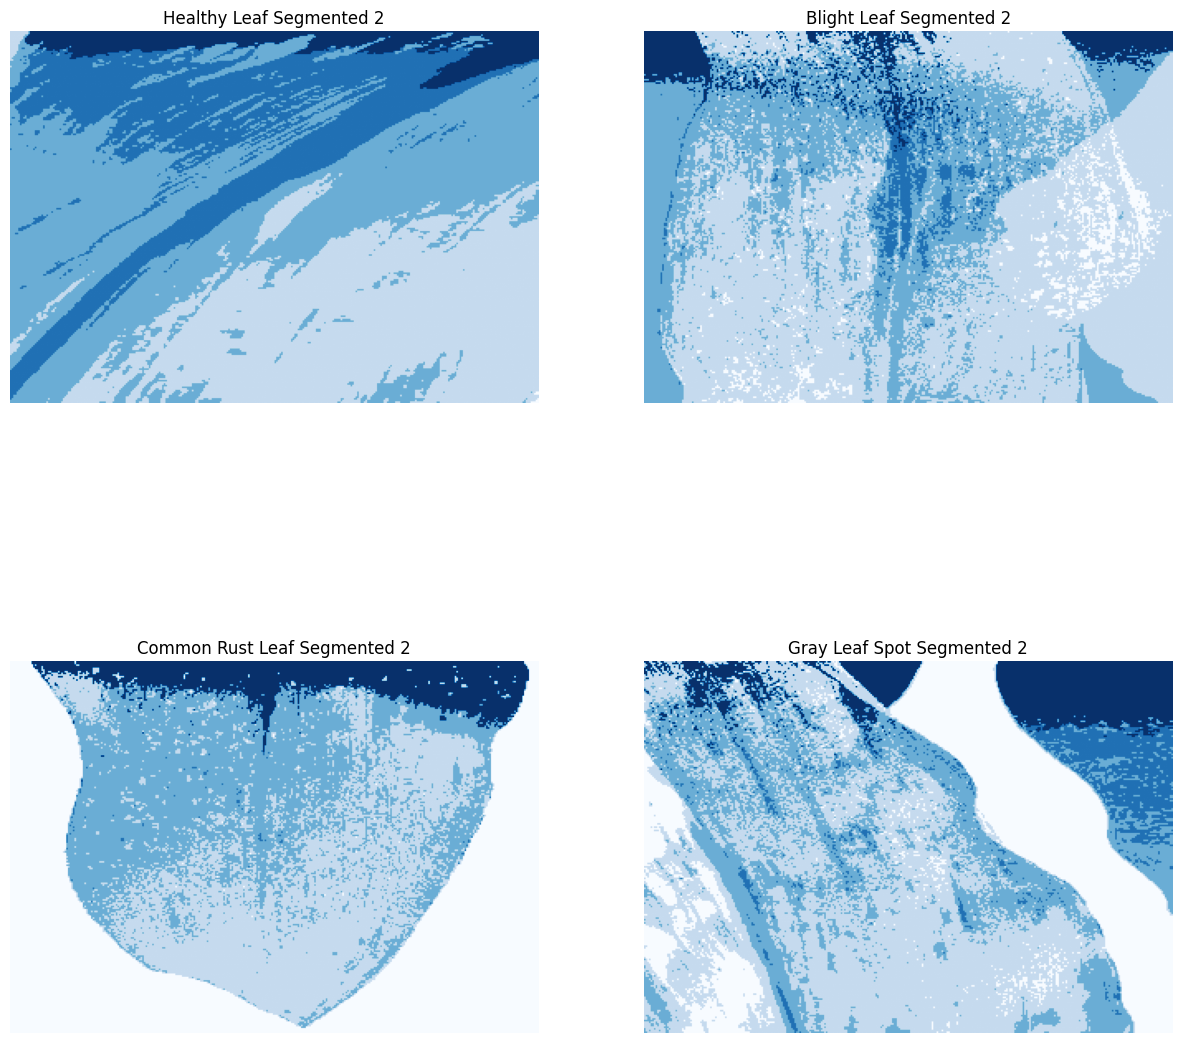

<Figure size 640x480 with 0 Axes>

In [124]:
# There are 5 segments in the below images :)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(healthy_gray_segmented2, cmap ='Blues')
plt.axis("off")
plt.title("Healthy Leaf Segmented 2")
plt.subplot(2,2,2)
plt.imshow(blight_gray_segmented2, cmap ='Blues')
plt.axis("off")
plt.title("Blight Leaf Segmented 2")
plt.subplot(2,2,3)
plt.imshow(common_rust_gray_segmented2, cmap ='Blues')
plt.axis("off")
plt.title("Common Rust Leaf Segmented 2")
plt.subplot(2,2,4)
plt.imshow(grayleafspot_gray_segmented2, cmap ='Blues')
plt.axis("off")
plt.title("Gray Leaf Spot Segmented 2")
plt.show()
plt.savefig('/content/drive/MyDrive/data/Fine tuned threshold segmentation.png')

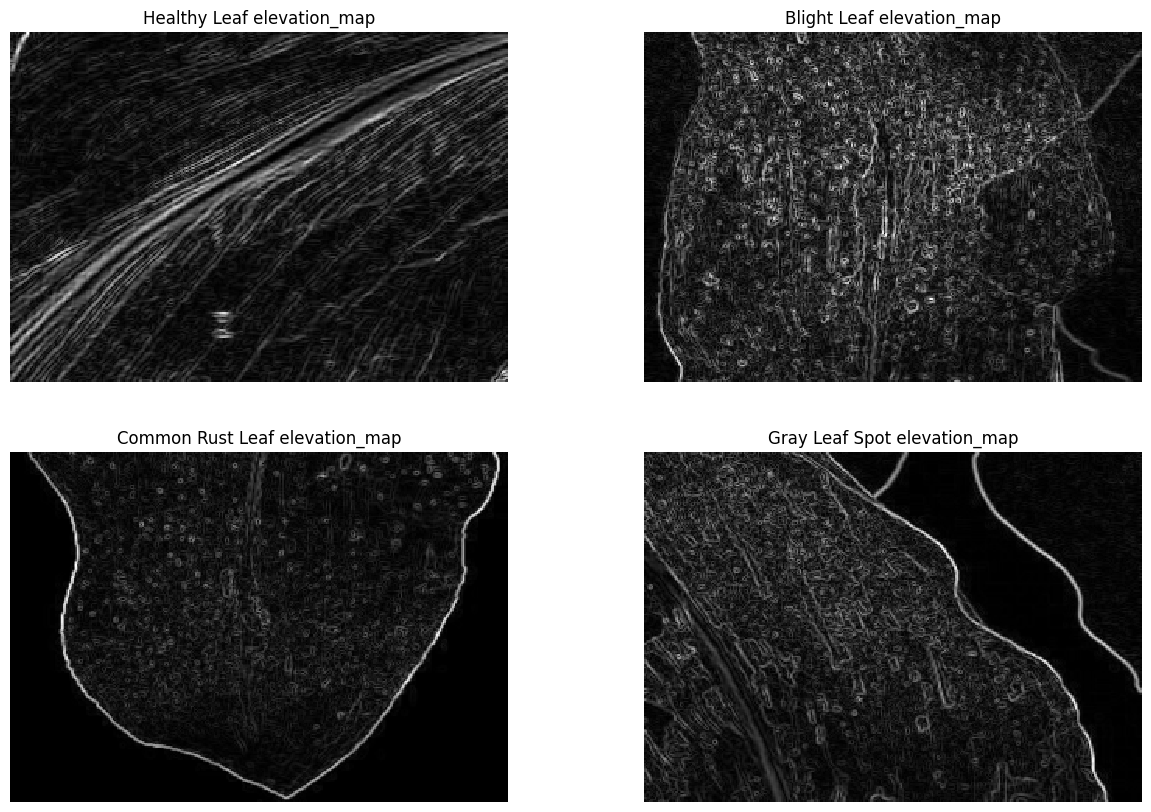

<Figure size 640x480 with 0 Axes>

In [125]:

#another type of segmentation
blight_imm=blight_1_resize[:,:,0]
elevation_map_blight = sobel(blight_imm)

healthy_imm=healthy_1_resize[:,:,0]
elevation_map_healthy = sobel(healthy_imm)

commonrust_imm=common_rust_1_resize[:,:,0]
elevation_map_commonrust = sobel(commonrust_imm)

grayleafspot_imm=grayleafspot_1_resize[:,:,0]
elevation_map_grayleafspot = sobel(grayleafspot_imm)


fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(elevation_map_healthy, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.title("Healthy Leaf elevation_map")
plt.subplot(2,2,2)
plt.imshow(elevation_map_blight, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.title('Blight Leaf elevation_map')
plt.subplot(2,2,3)
plt.imshow(elevation_map_commonrust, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.title("Common Rust Leaf elevation_map")
plt.subplot(2,2,4)
plt.imshow(elevation_map_grayleafspot, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.title("Gray Leaf Spot elevation_map")
plt.show()
plt.savefig('/content/drive/MyDrive/data/Segmentation using elevation map.png')

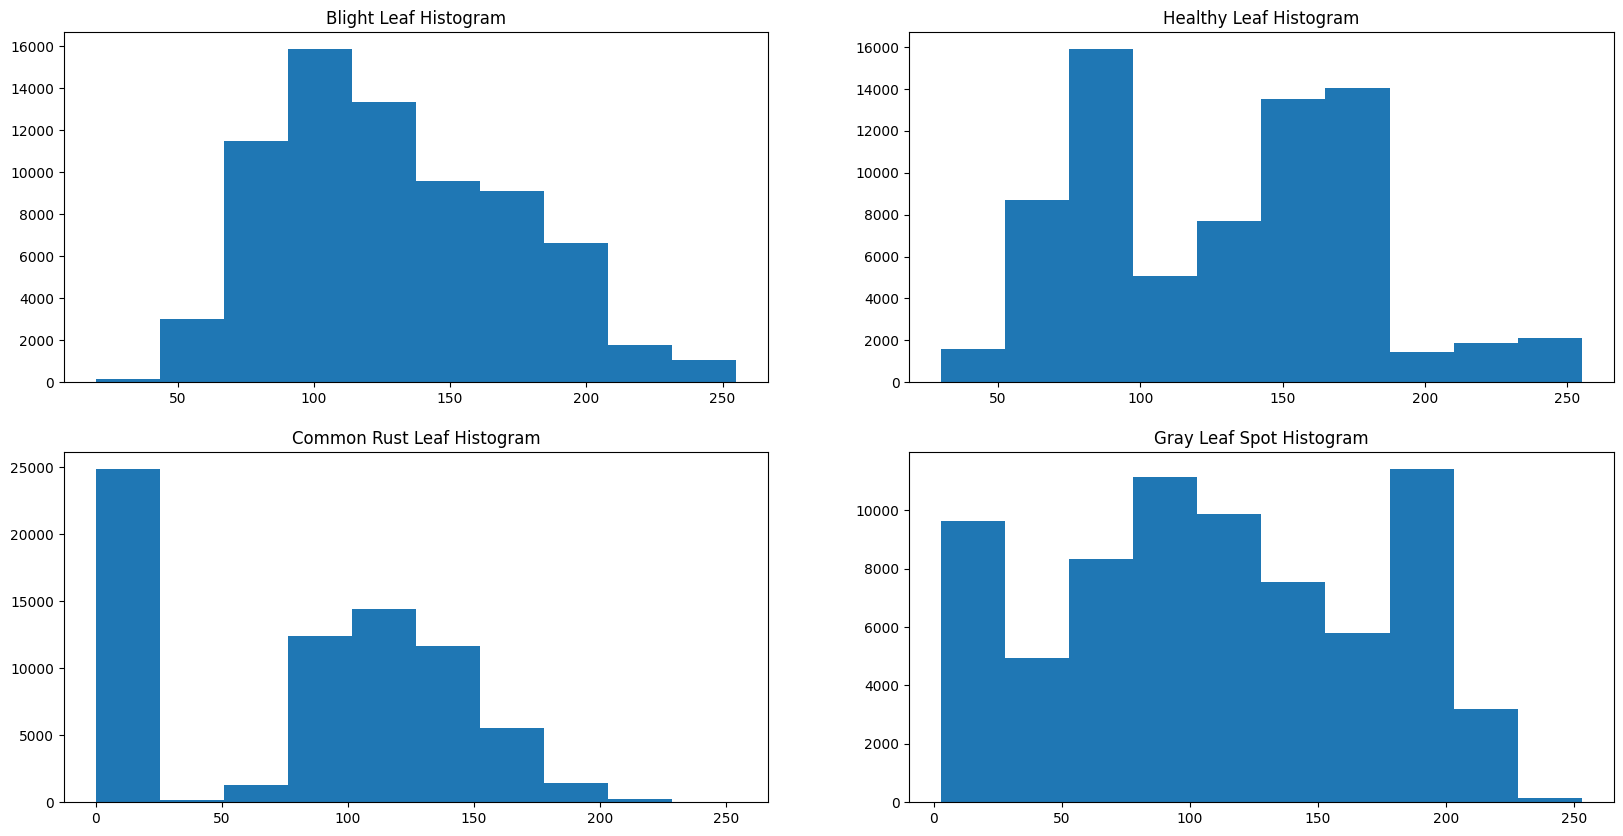

<Figure size 640x480 with 0 Axes>

In [126]:

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.hist(blight_imm.flatten())
plt.title("Blight Leaf Histogram")
plt.subplot(2,2,2)
plt.hist(healthy_imm.flatten())
plt.title("Healthy Leaf Histogram")
plt.subplot(2,2,3)
plt.hist(commonrust_imm.flatten())
plt.title("Common Rust Leaf Histogram")
plt.subplot(2,2,4)
plt.hist(grayleafspot_imm.flatten())
plt.title("Gray Leaf Spot Histogram")
plt.show()
plt.savefig('/content/drive/MyDrive/data/Histogram of elevation map iamges.png')


In [127]:
markers_blight = np.zeros_like(blight_imm)
markers_blight[blight_imm < 117] = 1
markers_blight[blight_imm > 232] = 2

markers_healthy = np.zeros_like(healthy_imm)
markers_healthy[healthy_imm < 117] = 1
markers_healthy[healthy_imm > 232] = 2

markers_commonrust = np.zeros_like(commonrust_imm)
markers_commonrust[commonrust_imm < 117] = 1
markers_commonrust[commonrust_imm > 232] = 2

markers_grayleafspot = np.zeros_like(grayleafspot_imm)
markers_grayleafspot[grayleafspot_imm < 117] = 1
markers_grayleafspot[grayleafspot_imm > 232] = 2


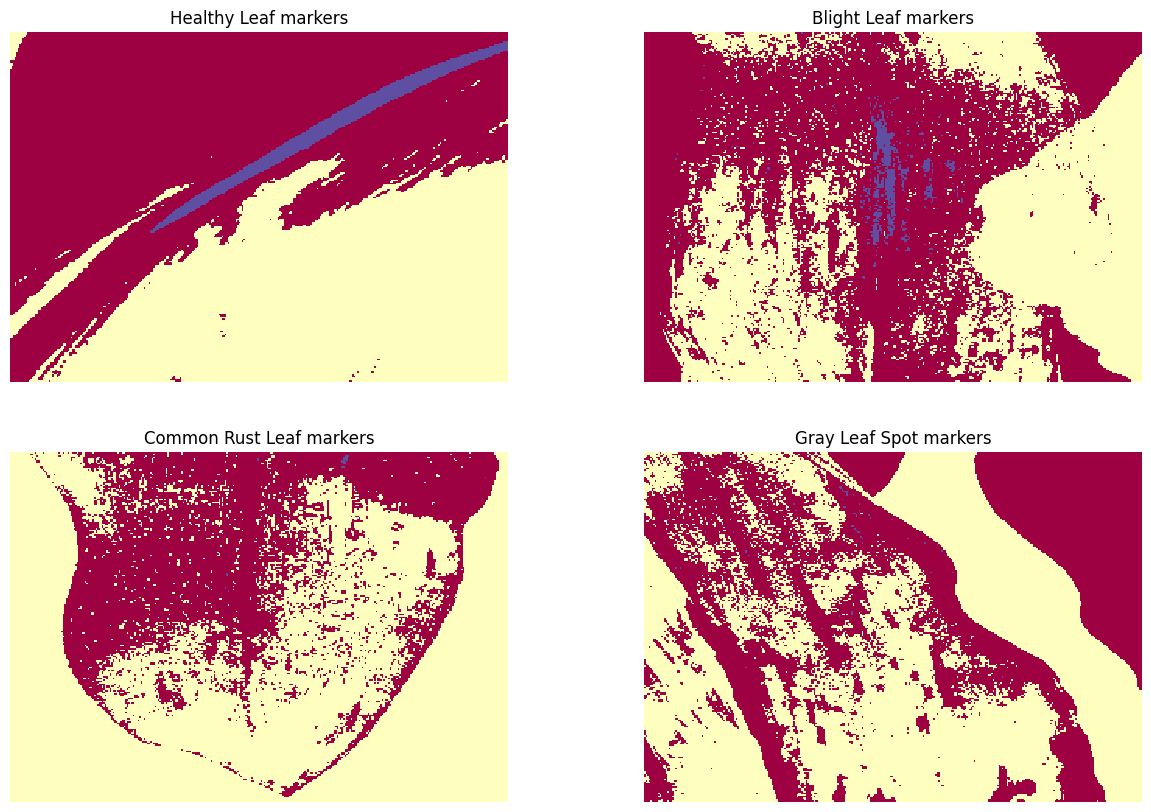

<Figure size 640x480 with 0 Axes>

In [128]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(markers_healthy, cmap='Spectral', interpolation='nearest')
plt.axis("off")
plt.title("Healthy Leaf markers")
plt.subplot(2,2,2)
plt.imshow(markers_blight, cmap='Spectral', interpolation='nearest')
plt.axis("off")
plt.title('Blight Leaf markers')
plt.subplot(2,2,3)
plt.imshow(markers_commonrust, cmap='Spectral', interpolation='nearest')
plt.axis("off")
plt.title("Common Rust Leaf markers")
plt.subplot(2,2,4)
plt.imshow(markers_grayleafspot, cmap='Spectral', interpolation='nearest')
plt.axis("off")
plt.title("Gray Leaf Spot markers")
plt.show()
plt.savefig('/content/drive/MyDrive/data/Segmentation using markers.png')

In [129]:
from skimage import segmentation

In [130]:
segmentation_blight = skimage.segmentation.watershed(elevation_map_blight, markers_blight)
segmentation_healthy = skimage.segmentation.watershed(elevation_map_healthy, markers_healthy)
segmentation_commonrust = skimage.segmentation.watershed(elevation_map_commonrust, markers_commonrust)
segmentation_grayleafspot = skimage.segmentation.watershed(elevation_map_grayleafspot, markers_grayleafspot)

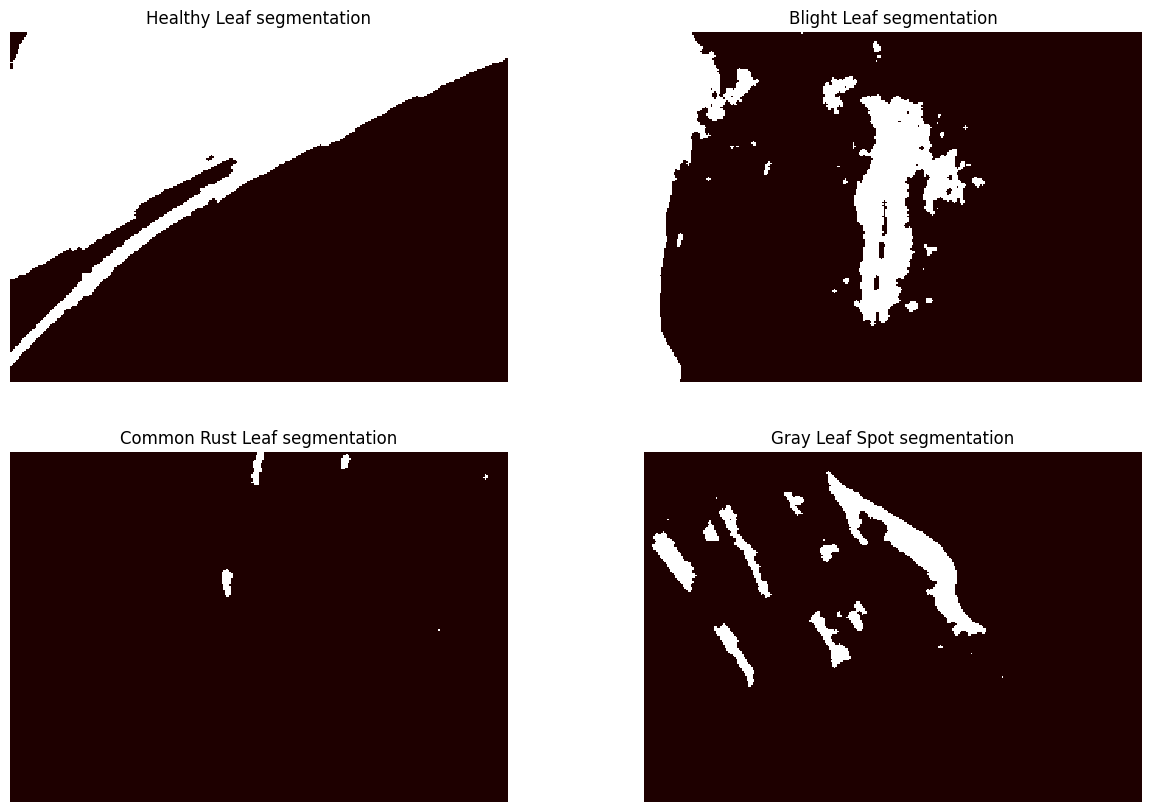

<Figure size 640x480 with 0 Axes>

In [131]:
fig, ax = plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(segmentation_healthy, cmap='pink', interpolation='nearest')
plt.axis("off")
plt.title("Healthy Leaf segmentation")
plt.subplot(2,2,2)
plt.imshow(segmentation_blight, cmap='pink', interpolation='nearest')
plt.axis("off")
plt.title('Blight Leaf segmentation')
plt.subplot(2,2,3)
plt.imshow(segmentation_commonrust, cmap='pink', interpolation='nearest')
plt.axis("off")
plt.title("Common Rust Leaf segmentation")
plt.subplot(2,2,4)
plt.imshow(segmentation_grayleafspot, cmap='pink', interpolation='nearest')
plt.axis("off")
plt.title("Gray Leaf Spot segmentation")
plt.show()
plt.savefig('/content/drive/MyDrive/data/Using segmentation from skimage.png')

In [132]:
from scipy import ndimage

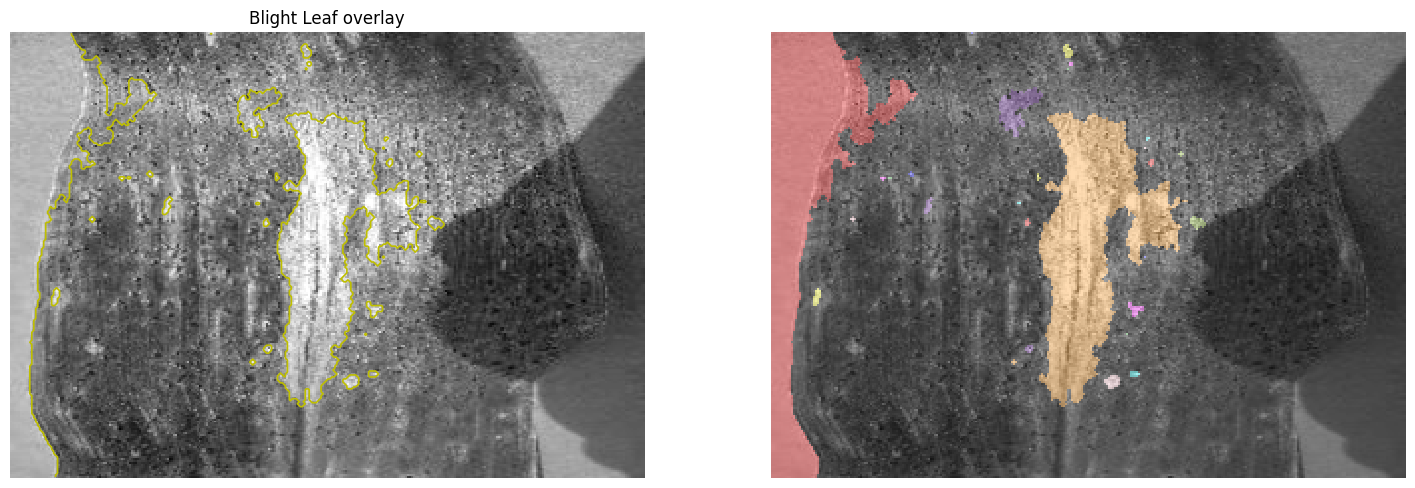

In [133]:
from skimage.color import label2rgb

segmentation_blight = ndimage.binary_fill_holes(segmentation_blight - 1)
labeled_mountains, _ = ndimage.label(segmentation_blight)
image_label_overlay = label2rgb(labeled_mountains, image=imm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
ax1.set_title('Blight Leaf')
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation_blight, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax1.set_title('Blight Leaf overlay')
ax2.set_adjustable('box')
plt.savefig('/content/drive/MyDrive/data/Blight leaf overlay.png')

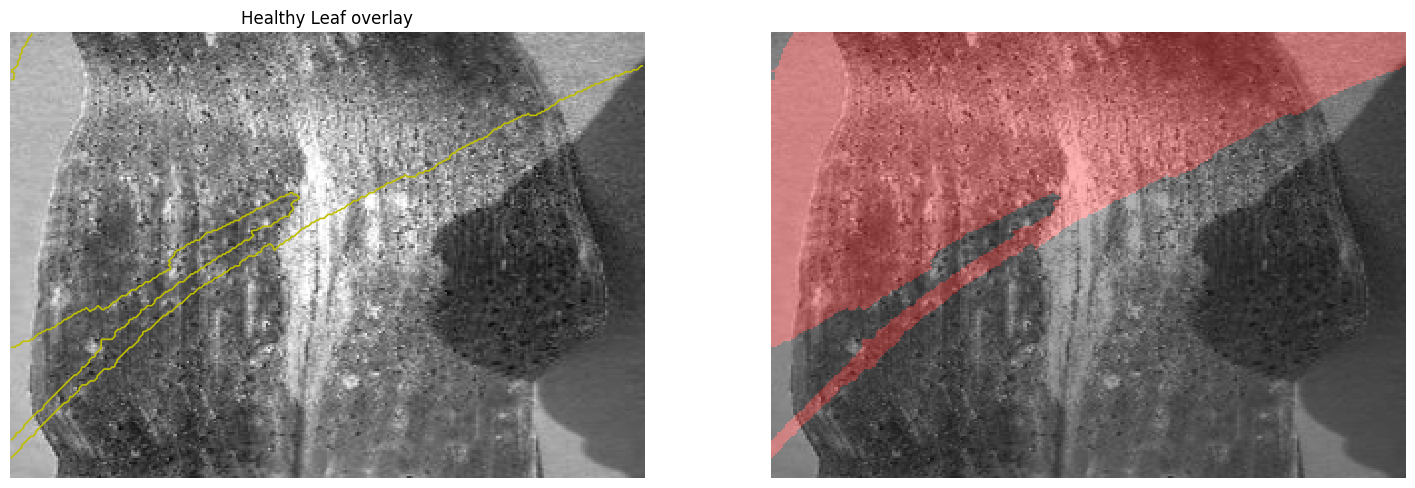

In [134]:
segmentation_healthy = ndimage.binary_fill_holes(segmentation_healthy - 1)
labeled_mountains, _ = ndimage.label(segmentation_healthy)
image_label_overlay = label2rgb(labeled_mountains, image=imm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
ax1.set_title('Healthy Leaf')
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation_healthy, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax1.set_title('Healthy Leaf overlay')
ax2.set_adjustable('box')
plt.savefig('/content/drive/MyDrive/data/healthy leaf overlay.png')

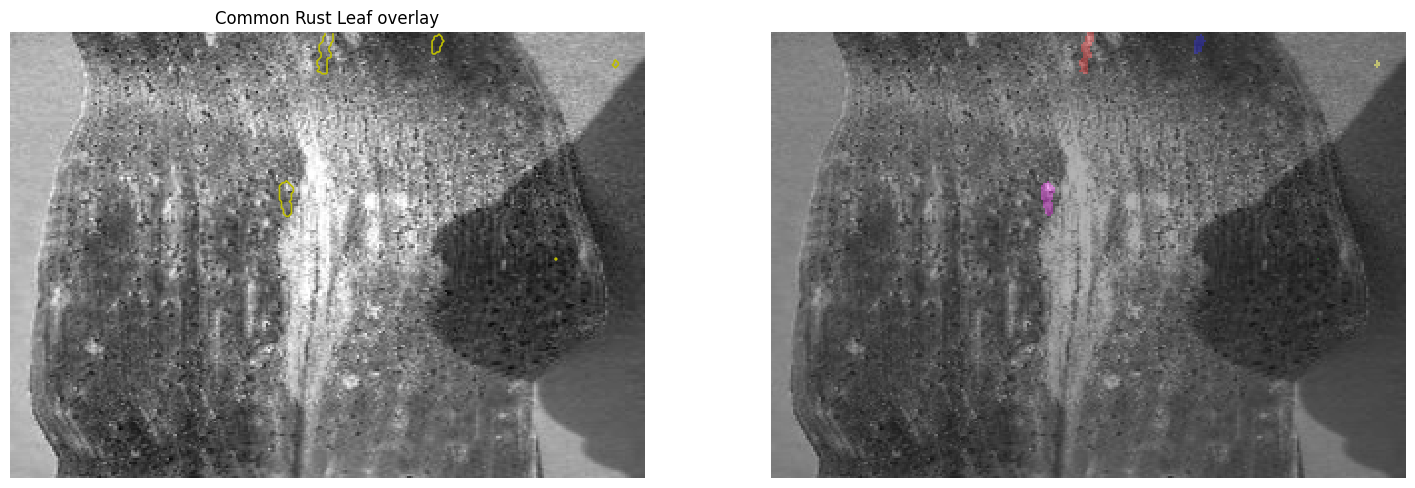

In [135]:
segmentation_commonrust = ndimage.binary_fill_holes(segmentation_commonrust - 1)
labeled_mountains, _ = ndimage.label(segmentation_commonrust)
image_label_overlay = label2rgb(labeled_mountains, image=imm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
ax1.set_title('Common Rust Leaf')
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation_commonrust, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax1.set_title('Common Rust Leaf overlay')
ax2.set_adjustable('box')
plt.savefig('/content/drive/MyDrive/data/Common rust overlay.png')

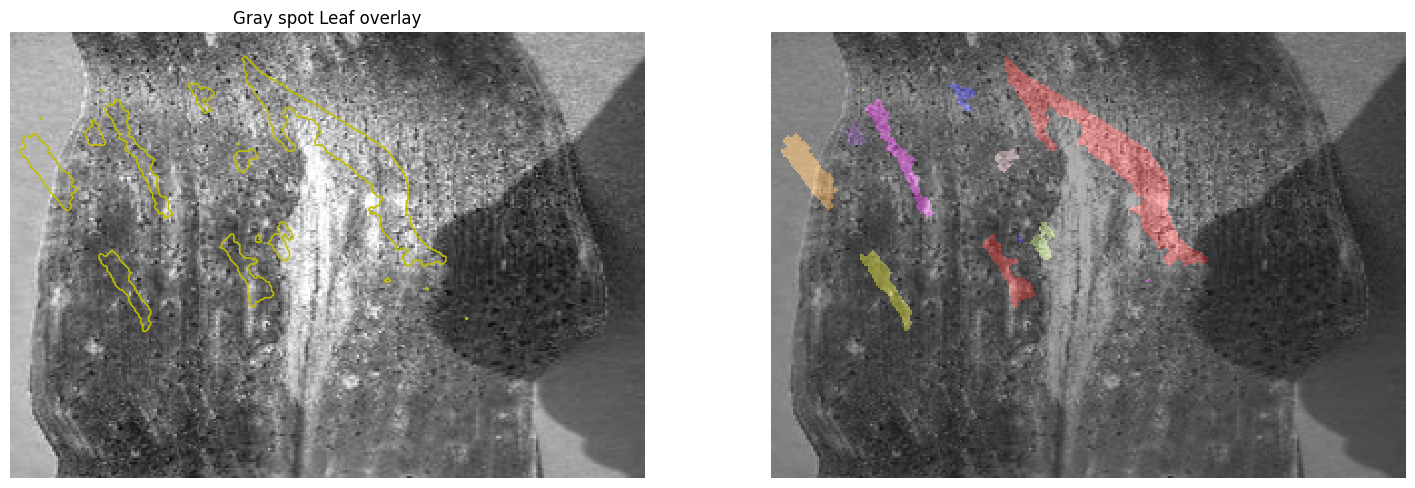

In [136]:
segmentation_grayleafspot = ndimage.binary_fill_holes(segmentation_grayleafspot - 1)
labeled_mountains, _ = ndimage.label(segmentation_grayleafspot)
image_label_overlay = label2rgb(labeled_mountains, image=imm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
ax1.set_title('Gray spot Leaf')
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation_grayleafspot, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax1.set_title('Gray spot Leaf overlay')
ax2.set_adjustable('box')
plt.savefig('/content/drive/MyDrive/data/Gray spot leaf overlay.png')

In [137]:
#Divides the pixels of the image into homogeneous clusters.
im_blight =blight_1_resize/255
pic_blight=im_blight.reshape(im_blight.shape[0]*im_blight.shape[1],im_blight.shape[2])

im_healthy =healthy_1_resize/255
pic_healthy=im_healthy.reshape(im_healthy.shape[0]*im_healthy.shape[1],im_healthy.shape[2])

im_commonrust =common_rust_1_resize/255
pic_commonrust=im_commonrust.reshape(im_commonrust.shape[0]*im_commonrust.shape[1],im_commonrust.shape[2])

im_grayleafspot =grayleafspot_1_resize/255
pic_grayleafspot=im_grayleafspot.reshape(im_grayleafspot.shape[0]*im_grayleafspot.shape[1],im_grayleafspot.shape[2])



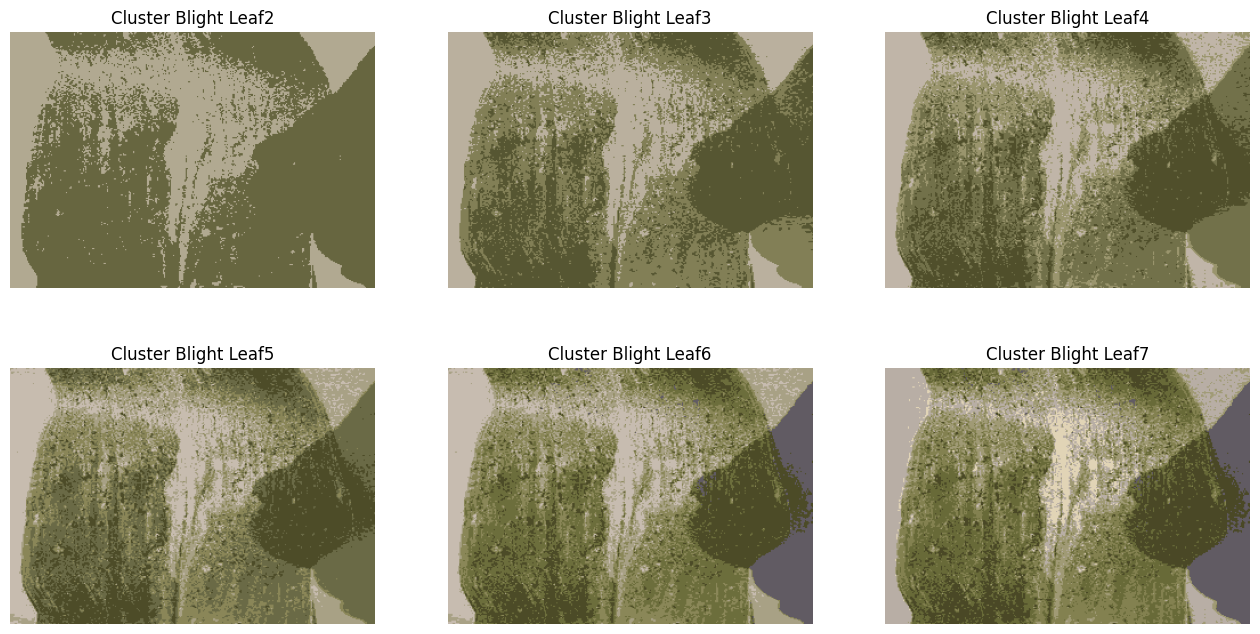

<Figure size 640x480 with 0 Axes>

In [138]:
# Since we know 5 segments was looking great on the image we are gonna do 5 clusters here but you can try more too :)
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic_blight)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster Blight Leaf'+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()
plt.savefig('/content/drive/MyDrive/data/Blight leaf Clustering .png')

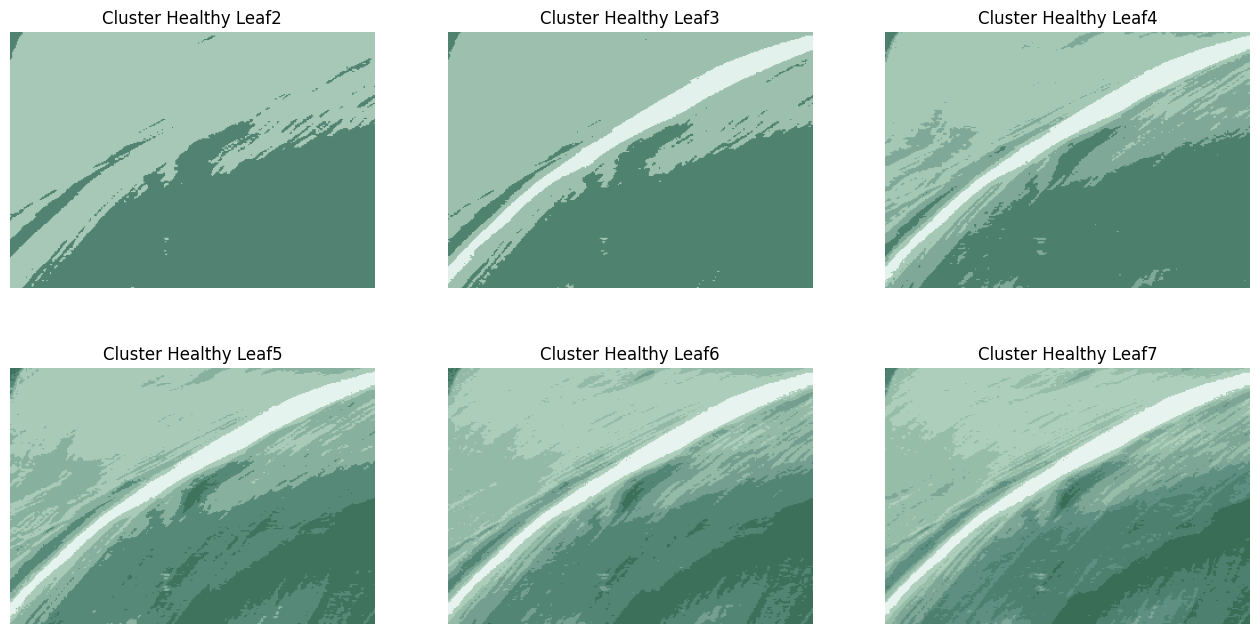

<Figure size 640x480 with 0 Axes>

In [139]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic_healthy)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster Healthy Leaf'+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()
plt.savefig('/content/drive/MyDrive/data/Healthy leaf clustering.png')

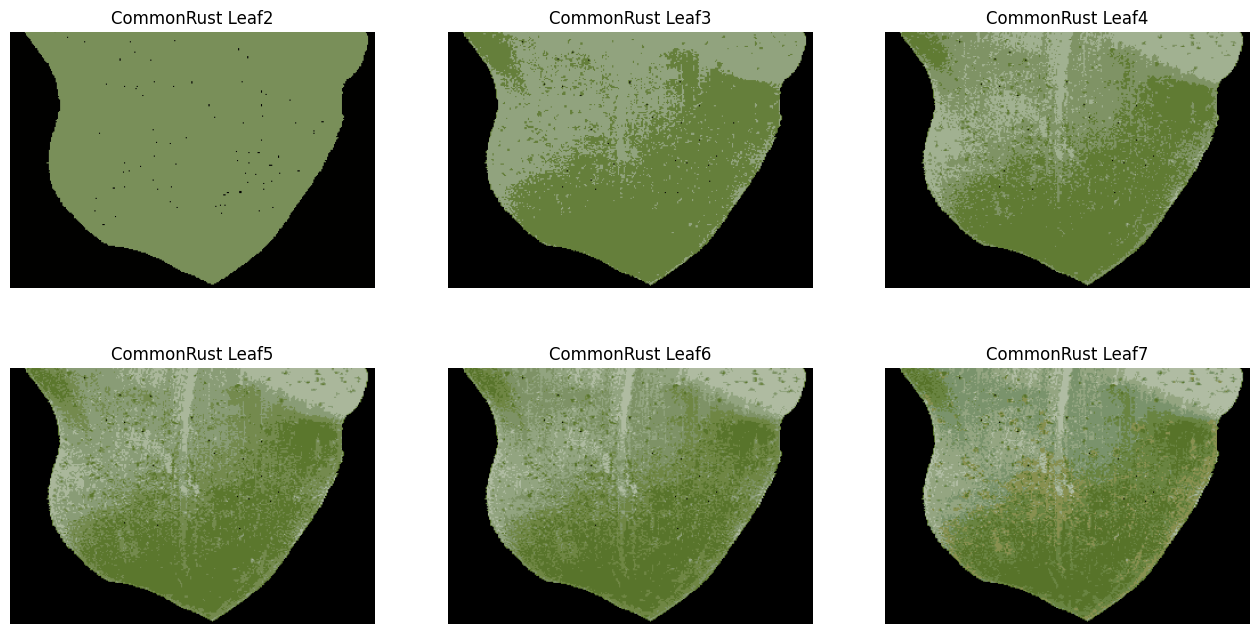

<Figure size 640x480 with 0 Axes>

In [140]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic_commonrust)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('CommonRust Leaf'+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()
plt.savefig('/content/drive/MyDrive/data/Common rust clustering.png')

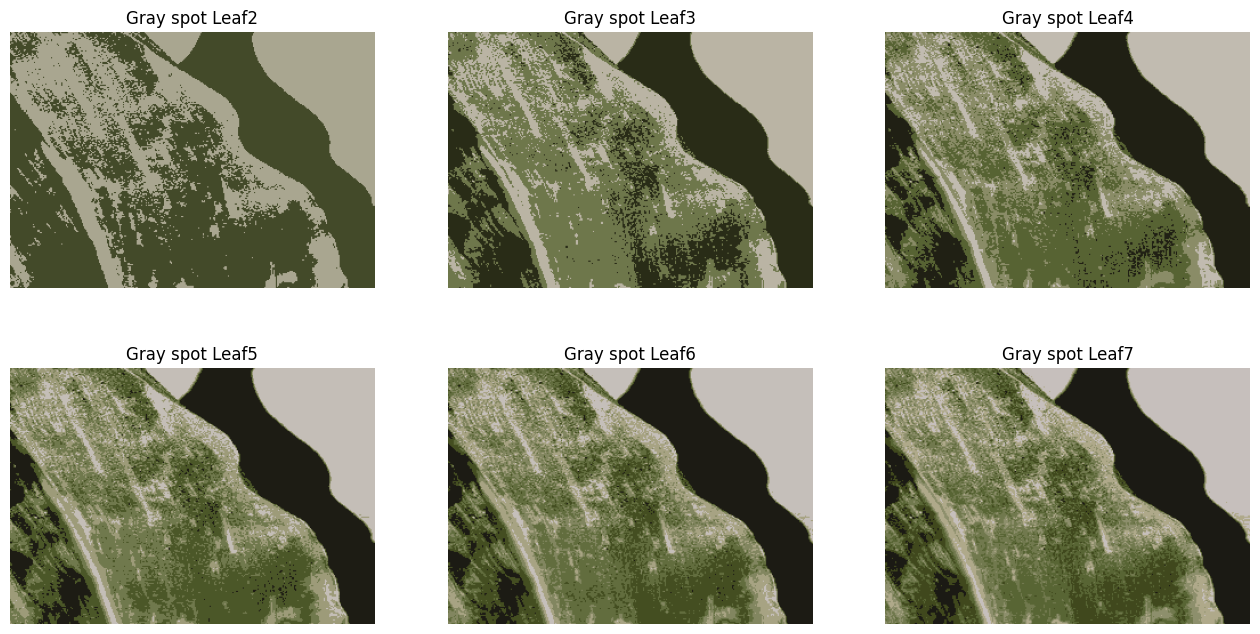

<Figure size 640x480 with 0 Axes>

In [141]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic_grayleafspot)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Gray spot Leaf'+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()
plt.savefig('/content/drive/MyDrive/data/Gray spot leaf clustering.png')